In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [8]:
# 데이터 준비

columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]

mpg_df = pd.read_csv('drive/MyDrive/Colab Notebooks/data-files/auto-mpg.data', names=columns,
                     sep=" ", na_values="?", comment="\t", skipinitialspace=True)
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
# 데이터 준비 2
# 1. mpg 컬럼을 y로 나머지 컬럼을 x로 분할
# 2. origin 컬럼을 one-hot-encoding 처리
# 3. 회귀모델 만들기 : mpg(y)를 예측하는 회귀모델
# 4. 훈련데이터 평가

In [55]:
# 데이터 준비 2-1
mpg_df.dropna(inplace=True)
y = mpg_df['mpg'].values
X = mpg_df.drop('mpg', axis=1)

X.shape, y.shape

((392, 7), (392,))

In [ ]:
# 데이터 준비 2-2

ohe_orgin = pd.get_dummies(X['origin']).astype(int)
X = pd.concat([X.drop('origin', axis=1), ohe_orgin], axis=1)
X.rename(columns={1: "USA", 2: "Europe", 3: "Japan"}, inplace=True)

# X.head()

# X = X.values

In [58]:
# 데이터 준비 2-3

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)

In [59]:
X.min(axis=0), X.max(axis=0)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [25]:
X.shape

(392, 9)

In [66]:
# 모델 구조 설계

model = tf_keras.Sequential()
model.add(tf_keras.layers.Input(shape=(9, )))
model.add(tf_keras.layers.Dense(64, activation='relu'))
model.add(tf_keras.layers.Dense(32, activation='relu'))
model.add(tf_keras.layers.Dense(1)) # 회귀 모델의 경우 출력층의 유닛갯수는 1

In [67]:
# 모델 훈련 설계

model.compile(loss="mse",
              # optimizer="adam",
              optimizer=tf_keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

In [68]:
# 모델 학습 (훈련)

fit_history = model.fit(X, y, batch_size=32, epochs=1000, validation_split=0.2)

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 493.3488 - mae: 21.2765 - val_loss: 1040.7303 - val_mae: 31.6903
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 473.7114 - mae: 20.7741 - val_loss: 1023.6622 - val_mae: 31.4210
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 470.7033 - mae: 20.6446 - val_loss: 1004.4630 - val_mae: 31.1133
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 463.1187 - mae: 20.3968 - val_loss: 979.2603 - val_mae: 30.7016
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 428.9586 - mae: 19.5557 - val_loss: 940.9550 - val_mae: 30.0640
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 425.3437 - mae: 19.4064 - val_loss: 886.1012 - val_mae: 29.1270
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 376.5835 - mae: 18.0558 - val_loss: 813.1075 - val_mae: 27.8277
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 312.6527 - mae: 16.1503 - val_loss: 719.3551 - val_mae: 26.0579
Epoc

In [70]:
print( model.evaluate(X, y)[1],  y.mean() )
print( model.evaluate(X, y)[1] / y.mean() )

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6573 - mae: 1.3657 
1.776899814605713 23.445918367346938
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6573 - mae: 1.3657 
0.0757871705755146


In [50]:
print( fit_history.history.keys() )
print( np.min(fit_history.history['loss']) )
print( np.min(fit_history.history['mae']) )

dict_keys(['loss', 'mae'])
8.511469841003418
2.1404242515563965


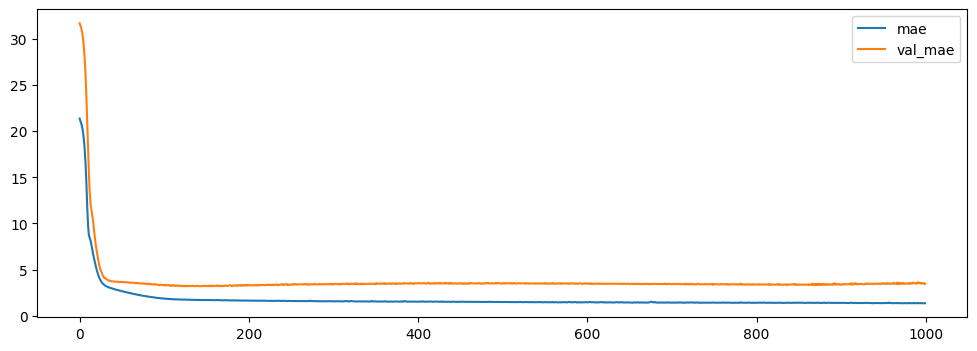

In [69]:
plt.figure(figsize=(12, 4))
plt.plot(fit_history.epoch, fit_history.history['mae'], label="mae")
plt.plot(fit_history.epoch, fit_history.history['val_mae'], label="val_mae")
plt.legend()
plt.show()